<h1><center><font size="6"><b>Проектная работа</b></font></center></h1>
<h1><center><font size="6"><b>Анализ базы данных сервиса для чтения книг</b></font></center></h1>

<h1><center><font size="5"><b>Цель: сформулировать ценностное предложение для нового продукта. </b></font></center></h1> 

<h1><center><font size="4"><b>Описание проекта</b></font></center></h1>

Коронавирус застал мир врасплох, изменив привычный порядок вещей. В свободное время жители городов больше не выходят на улицу, не посещают кафе и торговые центры. Зато стало больше времени для книг. Это заметили стартаперы — и бросились создавать приложения для тех, кто любит читать.

Ваша компания решила быть на волне и купила крупный сервис для чтения книг по подписке. Ваша первая задача как аналитика — проанализировать базу данных.
В ней — информация о книгах, издательствах, авторах, а также пользовательские обзоры книг. Эти данные помогут сформулировать ценностное предложение для нового продукта.

<h1><center><font size="4"><b>Описание данных</b></font></center></h1>

**Таблица `books`**

Содержит данные о книгах:

- `book_id` — идентификатор книги;
- `author_id` — идентификатор автора;
- `title` — название книги;
- `num_pages` — количество страниц;
- `publication_date` — дата публикации книги;
- `publisher_id` — идентификатор издателя.

**Таблица `authors`**

Содержит данные об авторах:

- `author_id` — идентификатор автора;
- `author` — имя автора.

**Таблица `publishers`**

Содержит данные об издательствах:

- `publisher_id` — идентификатор издательства;
- `publisher` — название издательства;

**Таблица `ratings`**

Содержит данные о пользовательских оценках книг:

- `rating_id` — идентификатор оценки;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, оставившего оценку;
- `rating` — оценка книги.

**Таблица `reviews`**

Содержит данные о пользовательских обзорах на книги:

- `review_id` — идентификатор обзора;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, написавшего обзор;
- `text` — текст обзора.

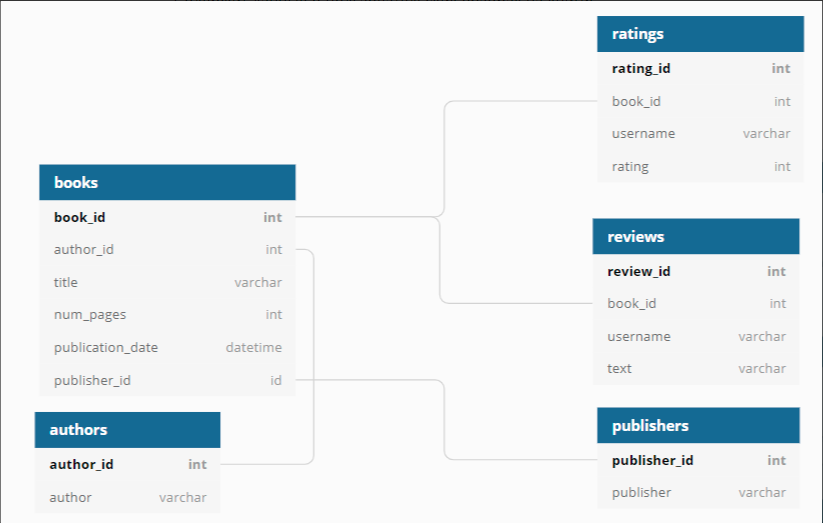

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных." data-toc-modified-id="Загрузка-данных.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных.</a></span></li><li><span><a href="#Определение-количества-книг,-которые-вышли-после-1-января-2000-года." data-toc-modified-id="Определение-количества-книг,-которые-вышли-после-1-января-2000-года.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Определение количества книг, которые вышли после 1 января 2000 года.</a></span></li><li><span><a href="#Определение-для-каждой-книги-количества-обзоров-и-средней-оценки." data-toc-modified-id="Определение-для-каждой-книги-количества-обзоров-и-средней-оценки.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Определение для каждой книги количества обзоров и средней оценки.</a></span></li><li><span><a href="#Определение-издательства,-которое-выпустило-наибольшее-число-книг-толще-50-страниц-(исключение-из-анализа-брошюр)." data-toc-modified-id="Определение-издательства,-которое-выпустило-наибольшее-число-книг-толще-50-страниц-(исключение-из-анализа-брошюр).-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Определение издательства, которое выпустило наибольшее число книг толще 50 страниц (исключение из анализа брошюр).</a></span></li><li><span><a href="#Определение-автора-с-самой-высокой-средней-оценкой-книг-(учитываются-только-книги-с-50-и-более-оценками)" data-toc-modified-id="Определение-автора-с-самой-высокой-средней-оценкой-книг-(учитываются-только-книги-с-50-и-более-оценками)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Определение автора с самой высокой средней оценкой книг (учитываются только книги с 50 и более оценками)</a></span></li><li><span><a href="#Определение-среднего-количества-обзоров-от-пользователей,-которые-поставили-больше-50-оценок." data-toc-modified-id="Определение-среднего-количества-обзоров-от-пользователей,-которые-поставили-больше-50-оценок.-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Определение среднего количества обзоров от пользователей, которые поставили больше 50 оценок.</a></span></li></ul></div>

## Загрузка данных.

In [1]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine
# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
 'pwd': 'Sdf4$2;d-d30pp', # пароль
 'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
 'port': 6432, # порт подключения
 'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
 db_config['pwd'],
 db_config['host'],
 db_config['port'],
 db_config['db'])
# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'}) 

In [2]:
# SQL запрос
def select(sql):
    return pd.io.sql.read_sql(sql, con = engine)

In [3]:
query = '''
SELECT * FROM books
'''
books = pd.io.sql.read_sql(query, con = engine)
query_1 = '''
SELECT * FROM authors
'''

authors = pd.io.sql.read_sql(query_1, con = engine)
query_2 = '''
SELECT * FROM publishers
'''

publishers = pd.io.sql.read_sql(query_2, con = engine)
query_3 = '''
SELECT * FROM ratings
'''

ratings = pd.io.sql.read_sql(query_3, con = engine)
query_4 = '''
SELECT * FROM reviews
'''

reviews = pd.io.sql.read_sql(query_4, con = engine)

In [4]:
# вывод
display(books.head())
display(authors.head())
display(publishers.head())
display(ratings.head())
display(reviews.head())

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


In [5]:
display(books.info())
display(authors.info())
display(publishers.info())
display(ratings.info())
display(reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
book_id             1000 non-null int64
author_id           1000 non-null int64
title               1000 non-null object
num_pages           1000 non-null int64
publication_date    1000 non-null object
publisher_id        1000 non-null int64
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
author_id    636 non-null int64
author       636 non-null object
dtypes: int64(1), object(1)
memory usage: 10.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
publisher_id    340 non-null int64
publisher       340 non-null object
dtypes: int64(1), object(1)
memory usage: 5.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 4 columns):
rating_id    6456 non-null int64
book_id      6456 non-null int64
username     6456 non-null object
rating       6456 non-null int64
dtypes: int64(3), object(1)
memory usage: 201.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 4 columns):
review_id    2793 non-null int64
book_id      2793 non-null int64
username     2793 non-null object
text         2793 non-null object
dtypes: int64(2), object(2)
memory usage: 87.4+ KB


None

У нас имеется к анализу 1000 книг 636 авторов.  
Книги выпущены в 340 издательствах.  
Для книг также есть пользовательсике оценки и отзывы.

## Определение количества книг, которые вышли после 1 января 2000 года.

In [6]:
books_cnt = '''
SELECT COUNT(book_id) AS books_cnt FROM books WHERE publication_date >= '2000-01-02'
'''
select(books_cnt)

,books_cnt
0,819


819 книг вышло после 1 января 2000 года.

## Определение для каждой книги количества обзоров и средней оценки.

In [7]:
ratings_reviews = '''
SELECT 
    books.title AS title,
    books.book_id AS id,
    COUNT(DISTINCT reviews.text) AS cnt_reviews,
    AVG(ratings.rating) AS avg_rating
FROM
    books
LEFT JOIN reviews ON reviews.book_id = books.book_id
LEFT JOIN ratings ON ratings.book_id = books.book_id

GROUP BY
     books.title,
     books.book_id
'''
select(ratings_reviews)

,title,id,cnt_reviews,avg_rating
0,'Salem's Lot,1,2,3.666667
1,1 000 Places to See Before You Die,2,1,2.500000
2,13 Little Blue Envelopes (Little Blue Envelope...,3,3,4.666667
3,1491: New Revelations of the Americas Before C...,4,2,4.500000
4,1776,5,4,4.000000
...,...,...,...,...
995,Wyrd Sisters (Discworld #6; Witches #2),996,3,3.666667
996,Xenocide (Ender's Saga #3),997,3,3.400000
997,Year of Wonders,998,4,3.200000
998,You Suck (A Love Story #2),999,2,4.500000


Для каждой из 1000 книг указана средняя оценка и количество обзоров.

## Определение издательства, которое выпустило наибольшее число книг толще 50 страниц (исключение из анализа брошюр).

In [8]:
book_publisher = '''
SELECT
     publishers.publisher AS name_publisher,
     COUNT(books.book_id) AS cnt_of_published_books
FROM
    publishers
INNER JOIN books ON books.publisher_id = publishers.publisher_id
WHERE
    books.num_pages > 50
GROUP BY
    name_publisher
ORDER BY 
    cnt_of_published_books DESC
LIMIT 1
'''
select(book_publisher)

,name_publisher,cnt_of_published_books
0,Penguin Books,42


Издательство Penguin Books выпустило больше всего книг объемом толще 50 страниц.

## Определение автора с самой высокой средней оценкой книг (учитываются только книги с 50 и более оценками)

In [9]:
best_author_ever = '''
SELECT
      SUBQ.author AS author,
      AVG(SUBQ.avg_rating) AS avg_rating
FROM
(SELECT
     authors.author AS author,
     books.book_id AS id,
     AVG(ratings.rating) AS avg_rating,
     COUNT(ratings.rating) AS cnt_rating
FROM
    authors
INNER JOIN books ON books.author_id = authors.author_id
INNER JOIN ratings ON ratings.book_id = books.book_id
GROUP BY
    author,
    id
    HAVING
    COUNT(ratings.rating) >= 50) AS SUBQ
GROUP BY
    author
ORDER BY
    avg_rating DESC
LIMIT 1
'''
select(best_author_ever)

,author,avg_rating
0,J.K. Rowling/Mary GrandPré,4.283844


Дуэт J.K. Rowling и Mary Grand Pré занимает первое место по самой высокой средней оценке среди книг с 50 и более оценками. 
<br> Серия книг о Гарри Поттере очень популярна.

## Определение среднего количества обзоров от пользователей, которые поставили больше 50 оценок.

In [10]:
avg_text = '''
SELECT ROUND(avg(count)) 
FROM
(SELECT
    COUNT(text)
FROM 
    reviews
FULL OUTER JOIN (SELECT username,
                COUNT(rating_id) as cnt
FROM 
    ratings
GROUP BY
        username) AS cnt_rating
ON cnt_rating.username = reviews.username
where cnt > 50
GROUP BY reviews.username) as count;                                  
'''
select(avg_text)

,round
0,24.0


В среднем 24 обзора обзора от пользователей, которые поставили больше 50 оценок.